# The Inverse Transform

##### Keywords: sampling, inverse transform, CDF,  box-muller, normal distribution

## Contents
{:.no_toc}
* 
{: toc}

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## The goal
The goal is, given a function or probability distribution, to produce a list of numbers whose histogram looks like that function. Although these samples could be used, e.g. to approximate an expectation involving the distribution, sampling is much more fundamental than integration, since it gives us samples we could use in lots of different ways. For instance we may want to draw multiple different samples and see how different an answer a fixed analysis procedure gives on each sample.


## A starting point
We're going to take it as given that computer algorithms can (psuedo) randomly set each bit in a 32 or 64 bit number. This gives a uniform distribution over the integers $[0,2^{32}-1]$ or $[0,2^{64}-1]$. With some care to deal with floating point representation, this can be translated into numbers uniform over [0,1].

In short, we assume technology has gifted us with a good black box to produce uniform(0,1) on our laptops.

## Sampling via the inverse

The basic idea behind the inverse transform method is to transform uniform samples into samples from a different distribution. That is, by somehow drawing from a uniform distribution, we make it possible to draw from the other distribution in question.

At first glance this seems to be a quixotic quest, but the key observation is this: the CDF of a distribution  is a function that ranges from  0 to 1. Now assume you  use $$Uniform(0,1)$$ to generate a random number, say 0.63. Now map this number on the range (or y-axis) to a x using the CDF curve to generate a sample. This process is illustrated below:

![](images/invtrans.png)

The left side is the PDF we want to sample from, and the right side is that distribution's CDF.

Notice that we randomly choose some samples from a uniform on the right hand side image and these correspond to  x's for the samples from the CDF.  On the left hand side we can see on the pdf the samples that these correspond to. If you sample from the uniform you will get more samples in the steep part of the cdf as the steep part of the cdf covers a good part of the probability values between 0 and 1. And thus you will get more samples in the higher parts of the pdf than elsewhere.

#### Caveat
Clearly, for all this to work, we must be able to calculate the inverse of the cdf function. Even though all CDFs are monotonic and thus invertible, actaully finding the inverse, or even the CDF itself, is often intractible. For instance, the CDF of the generally-well-behaved normal distribution can't even be written in closed form.

If we do find the inverse CDF, however, no sampling method can be better than inverse sampling.

## Let us formalize this:

This is the process:

1. get a uniform sample $u$ from $Unif(0,1)$
1. solve for $x$ yielding a new equation $x=F^{-1}(u)$ where $F$ is the CDF of the distribution we desire. 
1. repeat.

Why does this work?

First note that:

$F^{-1}(u) = $ smallest x such that $F(x) >=u$

What distribution does random variable $y = F^{-1}(u)$ follow?

The CDF of y  is $p(y <= x)$. Since F is monotonic, we can without loss of generality write:

$$p(y <= x) = p(F(y) <= F(x)) = p(u <= F(x)) = F(x)$$

Thus we get the CDF and hence the pdf that we want to sample from!

### Example: Draw from the distribution $f(x) \sim \exp{(-x)}$


 For example, lets assume we would like
to generate random numbers that follow the exponential distribution
$f(x) = \frac{1}{\lambda} e^{-x/\lambda}$ for $x\ge0$ and $f(x)=0$ 
otherwise. Following the recipe from above

$$ u = \int_{0}^{x} \frac{1}{\lambda} e^{-x'/\lambda} dx'  = 1- e^{-x/\lambda} $$ 

Solving for $x$ 
$$ x = - \lambda \ln (1-u) $$





Now we want the exponential with $\lambda = 1$. The following code will produce numbers that follow this $\exp{(-x)}$ distribution. The figure
generated by code below shows the resulting histogram of the generated numbers
compared to the actual $\exp{(-x)}$.

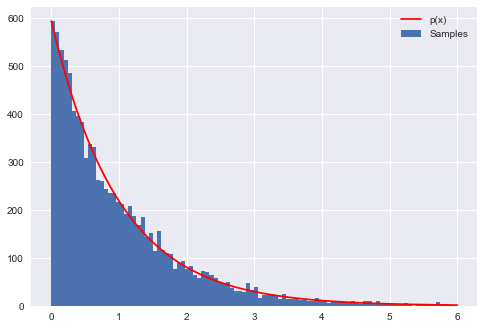

In [2]:
# probability distribution we're trying to calculate
p = lambda x: np.exp(-x)

# CDF of p
CDF = lambda x: 1-np.exp(-x)

# invert the CDF
invCDF = lambda r: -np.log(1-r)

# domain limits
xmin = 0 # the lower limit of our domain
xmax = 6 # the upper limit of our domain

# range limits
rmin = CDF(xmin)
rmax = CDF(xmax)

N = 10000 # the total of samples we wish to generate

# generate uniform samples in our range then invert the CDF
# to get samples of our target distribution
R = np.random.uniform(rmin, rmax, N)
X = invCDF(R)

# get the histogram info
hinfo = np.histogram(X,100)

# plot the histogram
plt.hist(X,bins=100, label=u'Samples');

# plot our (normalized) function
xvals=np.linspace(xmin, xmax, 1000)
plt.plot(xvals, hinfo[0][0]*p(xvals), 'r', label=u'p(x)')

# turn on the legend
plt.legend();


Et viola, the samples we've created have the correct histogram: values that are assigned more probability in the original function appear more often in our sample. (I.e. our vector of Xs contains more 1s than 3s, as intended).